<a href="https://colab.research.google.com/github/hexaquarks/PHYS339/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.1

In [ ]:
import numpy as np

OFFSET = 394.2573
timeMax, timeMin = [], []
temperatureMax, temperatureMin = [], []

with open(f'Exercise1_3Volt_MaximumAndMinimumTemp.csv', "r") as stream:
    # slicedMax = stream.readlines()[:393]
    # slicedMin = stream.readlines()[394:]
    for line in stream:
      currLine = line.split(",")
      if (float(currLine[0]) >= OFFSET):
        timeMin.append(float(currLine[0]) - OFFSET)
        temperatureMin.append(float(currLine[1]))
      else:
        timeMax.append(float(currLine[0]))
        temperatureMax.append(float(currLine[1]))

timeMax, timeMin = timeMax[40:], timeMin[40:]
temperatureMax, temperatureMin = temperatureMax[40:], temperatureMin[40:]
timeErrorMax = [0 for x in range(len(timeMax))]
temperatureErrorMax = [0.01 for x in range(len(temperatureMax))]
timeErrorMin = [0 for x in range(len(timeMin))]
temperatureErrorMin = [0.01 for x in range(len(temperatureMin))]

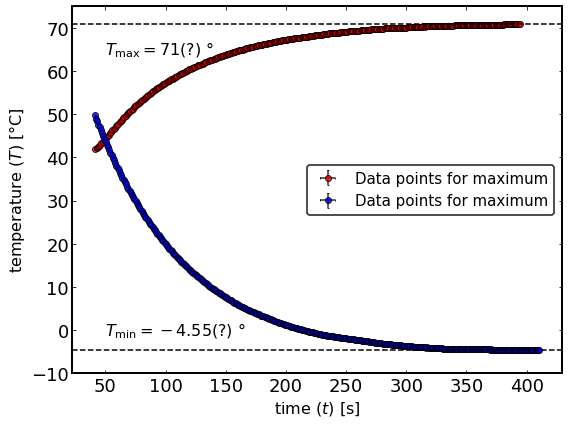

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8, 6])

ax.errorbar(
    x=timeMax,
    y=temperatureMax,
    xerr = timeErrorMax,
    yerr = temperatureErrorMax,
    fmt='ro', ecolor="black",mec="black", capsize=1,
    label = "Data points for maximum", alpha=0.8, zorder=-100)

ax.errorbar(
    x=timeMin,
    y=temperatureMin,
    xerr = timeErrorMin,
    yerr = temperatureErrorMin,
    fmt='bo', ecolor="black",mec="black", capsize=1,
    label = "Data points for maximum", alpha=0.8, zorder=-100)

## ticks 
ax.tick_params(axis='y',
               direction="in",
               right=True, labelsize=18)
ax.tick_params(axis='x', direction="in" , top=True,bottom=True, labelsize=18)

## legends and utilities
ax.set_xlabel(r"time $(t)$ $[$s$]$", fontsize=16)
ax.set_ylabel(r"temperature $(T)$ $[\degree$C$]$", fontsize=16)
ax.legend(loc='center right',fontsize=15)

## Horizontal line
ax.axhline(y=71,xmin=0, xmax=1, linestyle='--',color="black")
ax.axhline(y=-4.7,xmin=0, xmax=1, linestyle='--',color="black")

## border colors
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 
legend = ax.get_legend()
legend.get_frame().set_linewidth(1.7)
legend.get_frame().set_edgecolor("black")
ax.set_ylim(bottom=-10, top = 75)

## annotate plot
ax.text(50, 65, r'$T_{\max} = 71(?) \ \degree$', horizontalalignment='left', 
          verticalalignment='center', fontsize=16)
ax.text(50, 0, r'$T_{\min} = -4.55(?) \ \degree$', horizontalalignment='left', 
          verticalalignment='center', fontsize=16)

fig.tight_layout()


## 4.2

In [ ]:
import numpy as np

OFFSET = 41.45058
time =  []
temperature = []

with open(f'Exercise2_1_-10Deg.csv', "r") as stream:
    for line in stream:
      currLine = line.split(",")
      time.append(float(currLine[0]) - OFFSET)
      temperature.append(float(currLine[1]))

time = time[40:]
temperature = temperature[40:]
timeError = [0 for x in range(len(time))]
temperatureError = [0.01 for x in range(len(temperature))]

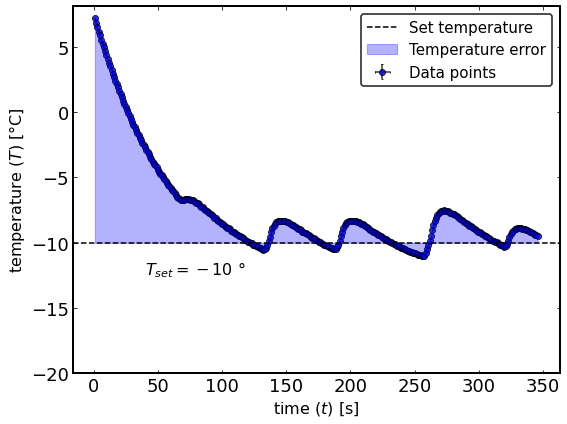

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8, 6])

ax.errorbar(
    x=time,
    y=temperature,
    xerr = timeError,
    yerr = temperatureError,
    fmt='bo', ecolor="black",mec="black", capsize=1,
    label = "Data points", alpha=0.8, zorder=-100)

## ticks 
ax.tick_params(axis='y',
               direction="in",
               right=True, labelsize=18)
ax.tick_params(axis='x', direction="in" , top=True,bottom=True, labelsize=18)

## Horizontal line
ax.axhline(y=-10,xmin=0, xmax=1, linestyle='--',color="black", label="Set temperature")

## Fil between for aesthetics
ax.fill_between(time, temperature, -10, color="blue", alpha=0.3, label="Temperature error")

## legends and utilities
ax.set_xlabel(r"time $(t)$ $[$s$]$", fontsize=16)
ax.set_ylabel(r"temperature $(T)$ $[\degree$C$]$", fontsize=16)
ax.legend(loc='upper right',fontsize=15)

## border colors
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 
legend = ax.get_legend()
legend.get_frame().set_linewidth(1.7)
legend.get_frame().set_edgecolor("black")
ax.set_ylim(bottom=-20)

## annotate plot
ax.text(40, -12, r'$T_{set} = -10 \ \degree$', horizontalalignment='left', 
          verticalalignment='center', fontsize=16)

fig.tight_layout()


## 4.3

In [ ]:
import numpy as np

timeNegative, timePositive =  [[] for x in range(3)], [[] for x in range(3)]
temperatureNegative, temperaturePositive = [[] for x in range(3)], [[] for x in range(3)]
BANDS = ["1", "5", "10"]

for i in range(len(BANDS)):
  with open(f'Exercise3_Negative10Temperature_Band{BANDS[i]}.csv', "r") as stream:
      for line in stream:
        currLine = line.split(",")
        timeNegative[i].append(float(currLine[0]))
        temperatureNegative[i].append(float(currLine[1]))
  with open(f'Exercise3_RoomTermperature_Band{BANDS[i]}.csv', "r") as stream:
      for line in stream:
        currLine = line.split(",")
        timePositive[i].append(float(currLine[0]))
        temperaturePositive[i].append(float(currLine[1]))

timeNegative = [x[20:] for x in timeNegative]
timePositive = [x[20:] for x in timePositive]
temperatureNegative = [x[20:] for x in temperatureNegative]
temperaturePositive = [x[20:] for x in temperaturePositive]

## Errors
timeNegativeError = [[0 for x in y] for y in timeNegative]
timePositiveError = [[0 for x in y] for y in timePositive]
temperatureNegativeError = [[0.01 for x in y] for y in temperatureNegative]
temperaturePositiveError = [[0.01 for x in y] for y in temperaturePositive]
# time = time[40:]
# temperature = temperature[40:]
# timeError = [0 for x in range(len(time))]
# temperatureError = [0.01 for x in range(len(temperature))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


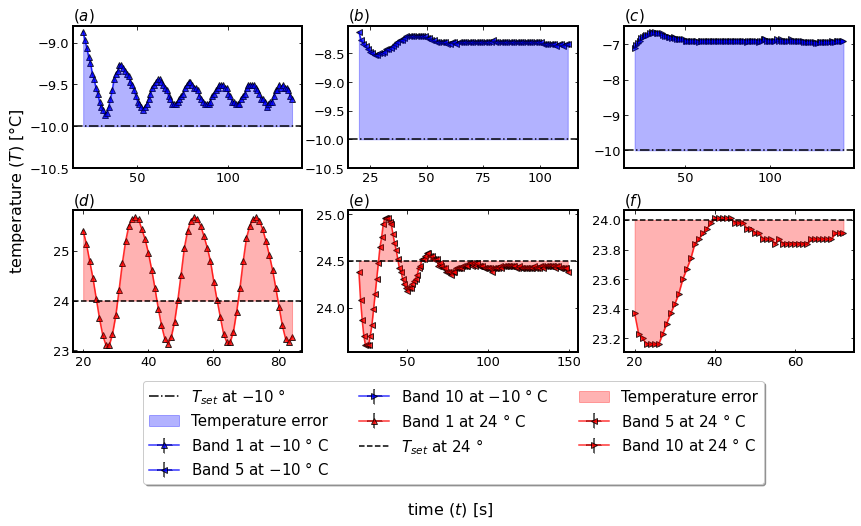

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

MARKERS = ["^", "<", ">"]
LABELS = [r"$(a)$", r"$(b)$",r"$(c)$",r"$(d)$",r"$(e)$", r"$(f)$"] 

fd = dict(
    fontsize=15,
    fontweight='heavy', 
    fontstyle='normal',
    color='black', 
    verticalalignment='baseline'
)

fig, ((a0, a1, a2), (a3, a4, a5)) = plt.subplots(
    2, 3,
    gridspec_kw={
     "wspace": 0.2,
     "hspace": 0.3
     },
    figsize=(14,6)
)
for i,a in enumerate([a0,a1,a2]):
  ## plot
  a.errorbar(
      x=timeNegative[i], 
      y=temperatureNegative[i],
      xerr=timeNegativeError[i],
      yerr=temperatureNegativeError[i],
      marker=MARKERS[i],
      color="blue", ecolor="black",mec="black", capsize=0.25,
      label = f'Band {BANDS[i]} at $-10 \ \degree$ C', alpha=0.8, zorder=-100)
  
  ## ticks 
  a.tick_params(axis='y',
                direction="in",
                right=True, labelsize=13)
  a.tick_params(axis='x', direction="in" , top=True,bottom=True, labelsize=13)

  ## Horizontal line
  a.axhline(y=-10,xmin=0, xmax=1, linestyle='-.',color="black", 
            label=r'$T_{set}$ at $-10 \ \degree$' if i == 0 else "")

  ## Fil between for aesthetics
  a.fill_between(timeNegative[i], temperatureNegative[i], -10, color="blue", 
                 alpha=0.3, label="Temperature error" if i==0 else "")
  
  a.set_ylim(bottom =-10.5)
  ## border colors
  a.patch.set_edgecolor('black')  
  a.patch.set_linewidth('2') 

for i,a in enumerate([a3,a4,a5]):
  a.errorbar(
      x=timePositive[i], 
      y=temperaturePositive[i],
      xerr=timePositiveError[i],
      yerr=temperaturePositiveError[i],
      marker=MARKERS[i],
      color="red", ecolor="black",mec="black", capsize=0.25,
      label = f'Band {BANDS[i]} at $24 \ \degree$ C', alpha=0.8, zorder=-100)
  
  ## ticks 
  a.tick_params(axis='y',
                direction="in",
                right=True, labelsize=13)
  a.tick_params(axis='x', direction="in" , top=True,bottom=True, labelsize=13)

  ## Horizontal line
  if (i==1):
    a.axhline(y=24.5,xmin=0, xmax=1, linestyle='--',color="black",
              label=r'$T_{set}$ at $24 \ \degree$')
    a.fill_between(timePositive[i], temperaturePositive[i], 24.5, color="red", 
                 alpha=0.3, label="Temperature error")
  else:
    a.axhline(y=24,xmin=0, xmax=1, linestyle='--',color="black")
    a.fill_between(timePositive[i], temperaturePositive[i], 24 , color="red", 
                 alpha=0.3)
    
  ## border colors
  a.patch.set_edgecolor('black')  
  a.patch.set_linewidth('2') 

for i,a in enumerate([a0,a1,a2,a3,a4,a5]):
  a.set_title(f'{LABELS[i]}', fontdict=fd, loc='left', color='black')

fig.text(0.5, -0.25, f'time $(t)$ $[$s$]$', ha='center', fontsize=16)
fig.text(0.06, 0.5, f'temperature $(T)$ $[\degree$C$]$', va='center',
         rotation='vertical', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.45, 0.08) ,
          ncol=3, fancybox=True, shadow=True, fontsize=15)

fig.tight_layout()
